In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dflist = []
for i in range(21):
    df = pd.read_csv('../experiment/pc5/CHHCO/output/selected.%s.txt'%(i), header=None)
    df.columns = [i]
    dflist.append(df)

dffull = pd.concat(dflist, axis=1)



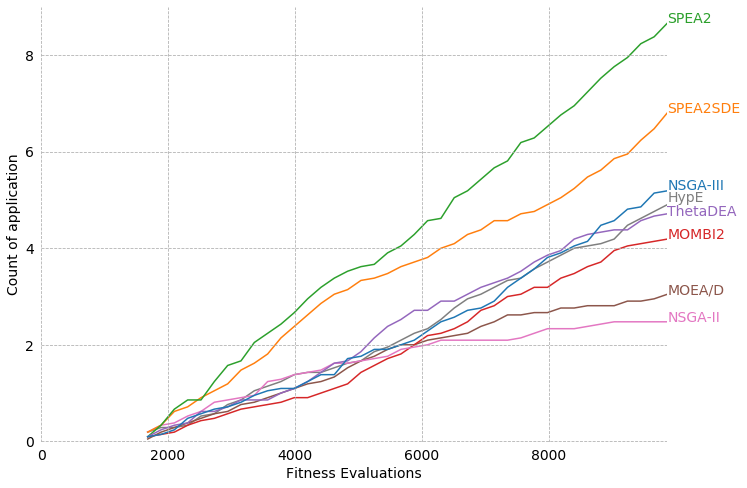

In [2]:
dflist = []
for i in range(8):
    dflist.append((dffull == i).cumsum().mean(axis=1))
    
df = pd.concat(dflist, axis=1)
df.columns = ['SPEA2', 'CMOEAD','NSGAII','CMOMBI2','NSGAIII','ThetaDEA','SPEA2SDE','HypE']


colors={
    "NSGAIII": "tab:blue",
    "SPEA2SDE": "tab:orange",
    "SPEA2": "tab:green",
    "CMOMBI2": "tab:red",
    "ThetaDEA": "tab:purple",
    "CMOEAD": "tab:brown",
    "NSGAII": "tab:pink",
    "HypE": "tab:grey",
}


labels={
    "NSGAIII": "NSGA-III",
    "SPEA2SDE": "SPEA2SDE",
    "SPEA2": "SPEA2",
    "CMOMBI2": "MOMBI2",
    "ThetaDEA": "ThetaDEA",
    "CMOEAD": "MOEA/D",
    "NSGAII": "NSGA-II",
    "HypE": "HypE"
}


offset={
    "NSGAIII":   0.02,
    "SPEA2SDE":  0.0,
    "SPEA2":     0.0,
    "CMOMBI2":   0.0,
    "ThetaDEA":  -0.05,
    "CMOEAD":    0.0,
    "NSGAII":    0.0,
    "HypE":      0.05,
    "CMOEADD":   0.0,
    "CHHCO":     0.0,
}


dfmax = df.iloc[[-1]]
df['FE'] = (df.index * 210) + (8 * 210)

f = plt.figure(figsize=(12, 8))
ax = f.gca()
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

algs=["HypE","CMOEAD","CMOMBI2","NSGAII","SPEA2SDE","SPEA2","ThetaDEA","NSGAIII"]
for alg in algs:
    df.plot(x="FE", y=alg, ax=f.gca(), legend=False, color=colors[alg], style="-",zorder=1)
    plt.text(9870, dfmax[alg]+offset[alg], labels[alg], color=colors[alg], fontsize=14)


plt.xlabel("Fitness Evaluations", fontsize=14)
plt.ylabel("Count of application", fontsize=14)
ax.grid(True, ls='--', which='both')
ax.set_yticks(np.arange(0, 11, step=2))
ax.tick_params(axis='both', which='both', labelsize=14,
           bottom=False, top=False, labelbottom=True,
           left=False, right=False, labelleft=True)

ax.set_xlim(0, 9870)
ax.set_ylim(-0.01, 9)
plt.subplots_adjust(right=0.85)
plt.show()
f.savefig("selectedMean.pdf")

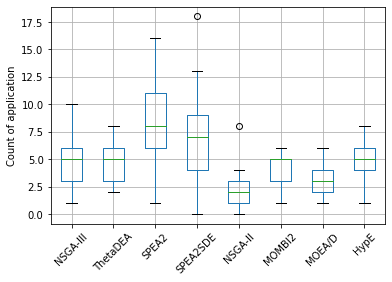

In [4]:
dflist = []
for i in range(8):
    dflist.append((dffull == i).cumsum().iloc[[-1]])

dfl = pd.concat(dflist, axis=0)
dfl = dfl.transpose()
dfl.columns = ['SPEA2', 'CMOEAD','NSGAII','CMOMBI2','NSGAIII','ThetaDEA','SPEA2SDE','HypE']
dfl = dfl[['NSGAIII', 'ThetaDEA', 'SPEA2', 'SPEA2SDE', 'NSGAII', 'CMOMBI2', 'CMOEAD', 'HypE']]


f = plt.figure()
ax = f.gca()
dfl.boxplot(ax=ax)
ax.set_ylabel('Count of application')
ax.set_xticklabels(['NSGA-III', 'ThetaDEA', 'SPEA2', 'SPEA2SDE', 'NSGA-II', 'MOMBI2', 'MOEA/D', 'HypE'], rotation=45)
f.savefig("selectedBoxplot.pdf")